# IMDS Workshop - week 3
### *By Jeffrey Giansiracusa*

---

This worksheet covers the content of lectures

    3.1 Integration and area
    3.2 The Fundamental Theorem of Calculus
    3.3 Directional derivatives
    3.4 Partial derivatives
    3.5 Gradient descent
    
Key skills to focus on:
 
 1. Be able to estimate the value of an integral from the graph of a function.
 2. Be able to calculate patial derivatives, gradients, and directional derivates both numerically and symbolically for functions $f(x,y)$ or $f(x,y,z)$ or $f(x,y,z,w)$, etc.
 3. Relate the gradient to directional derivatives.


# Initialization code to run before you start your work

Click on the cell below and then type Shift-Return to execute it.

In [ ]:
import numpy as np
import sympy as sym
import math
from sympy import latex, diff
from IPython.display import display, Math

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import Viridis
output_notebook()

def G(v):
    return (v[0]-2)**2 + (v[1]-3)**2 + 4

def g(x,y):
    return x + y**2 - 4*np.sin(2*x+y) + 6


---

## Exercise 1 - Integration

(You won't need any Python for this one.)

Consider the function $f(x)$ whose graph is shown below.
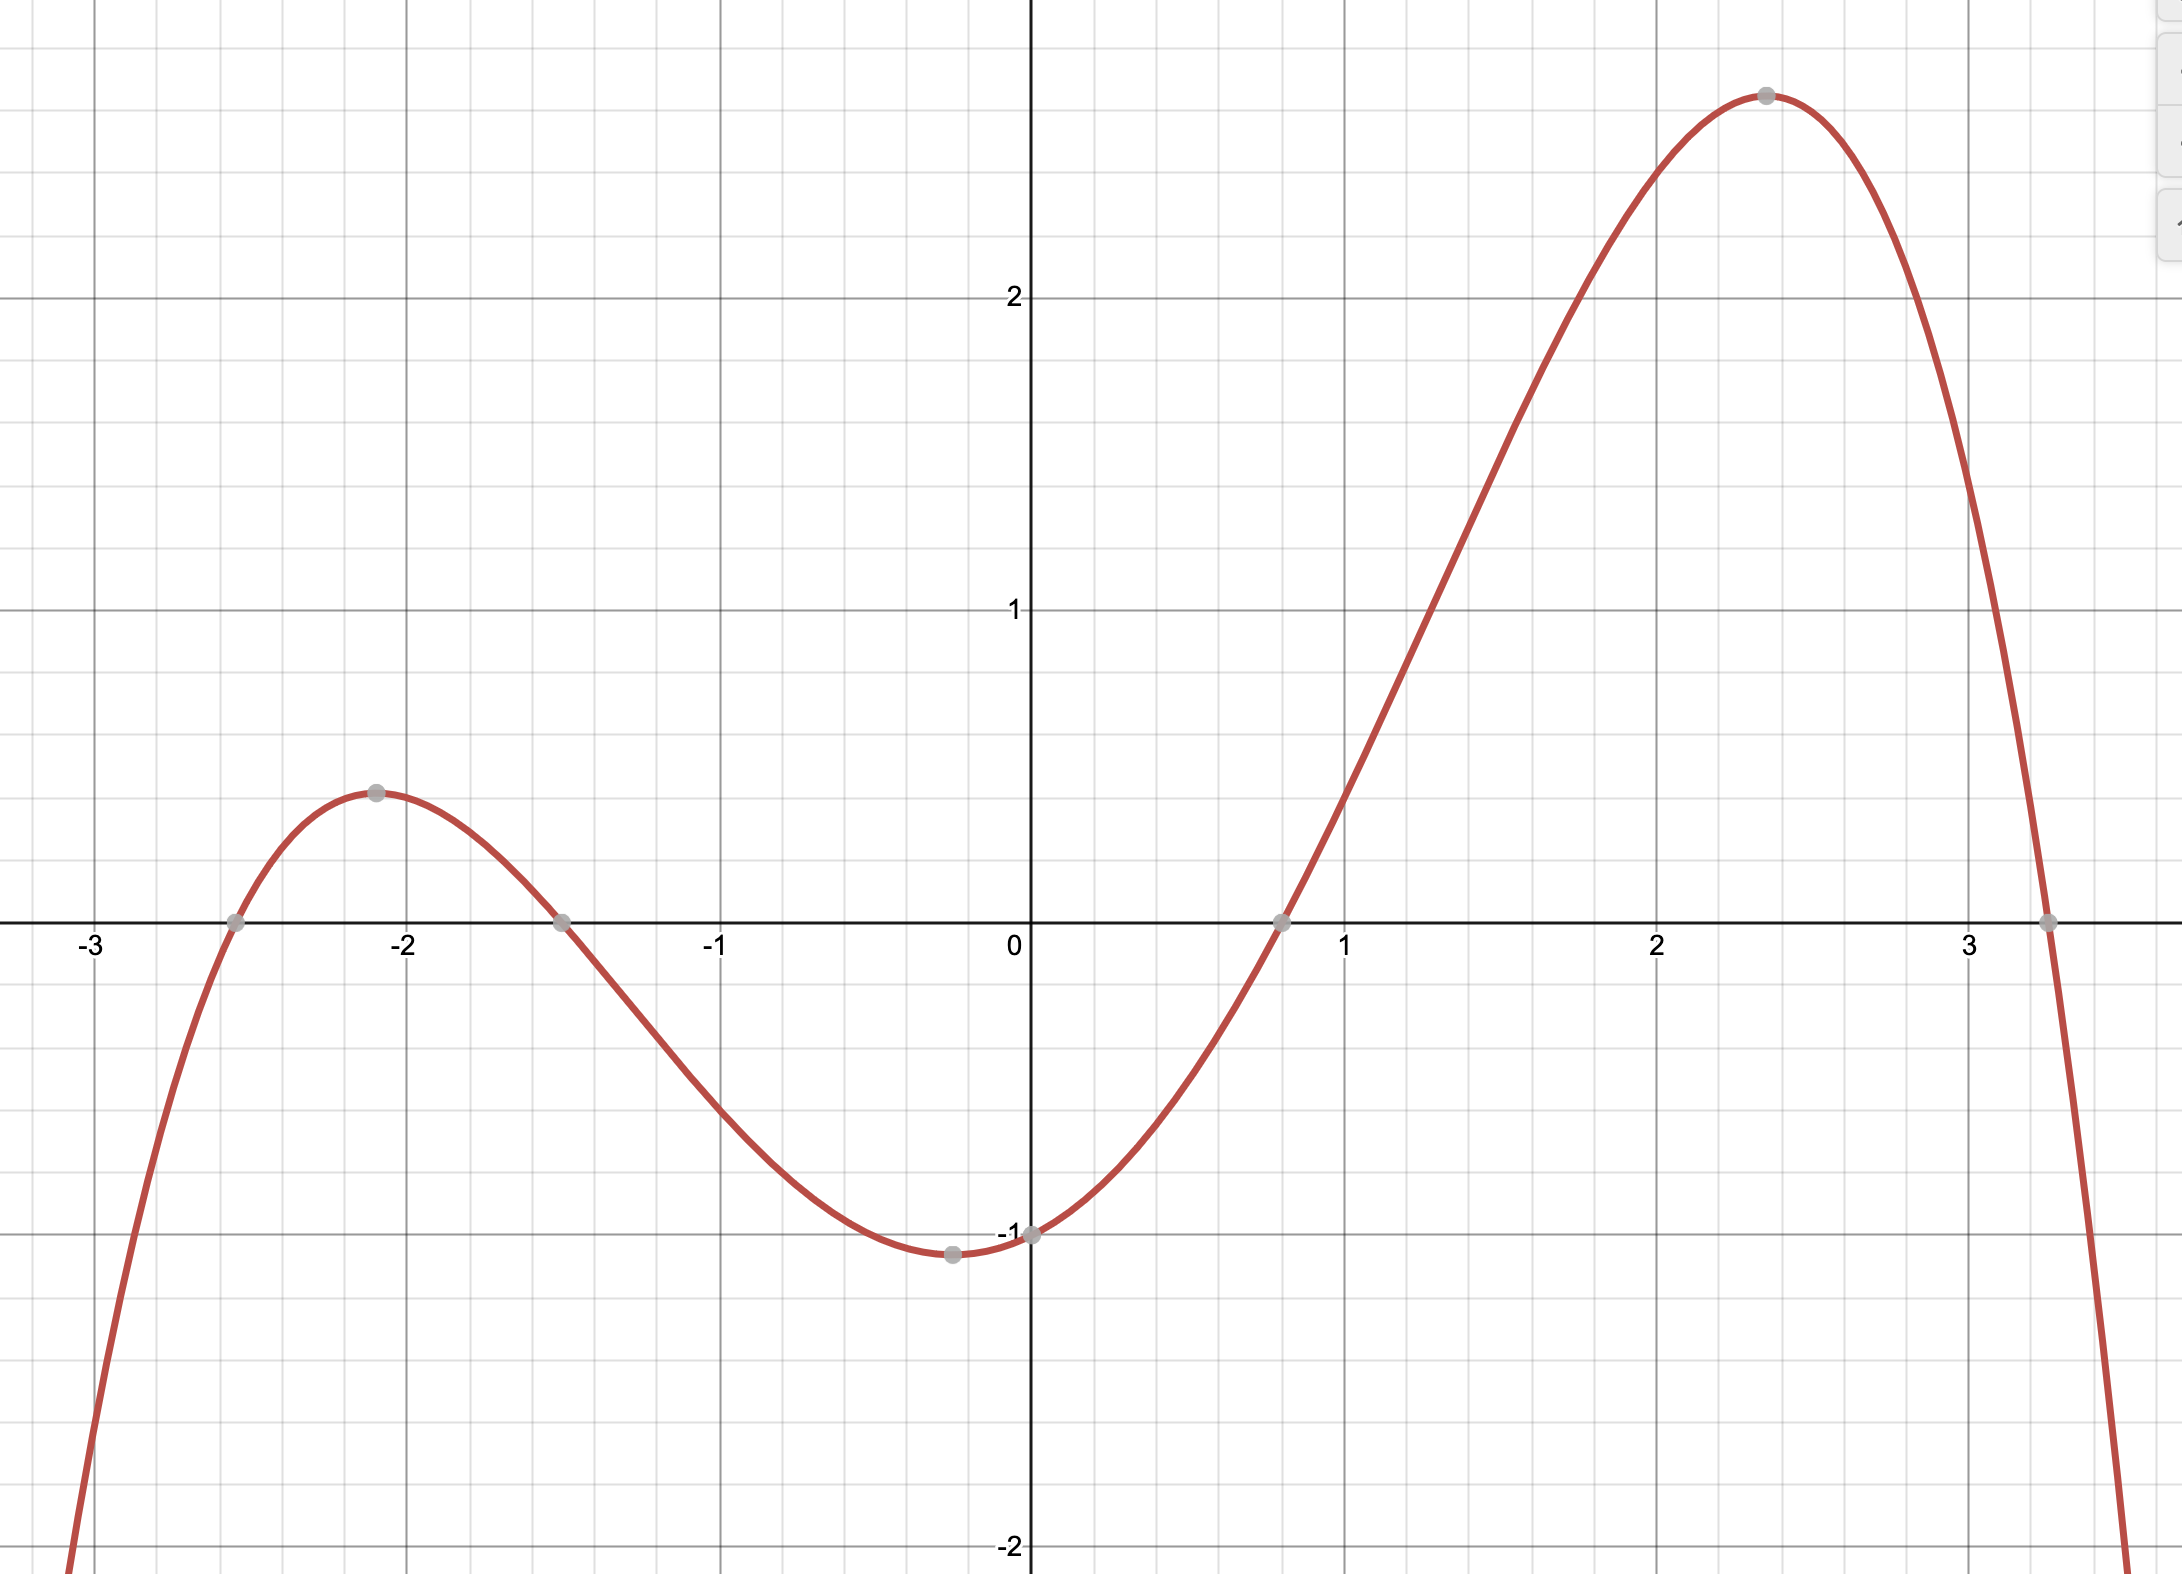

### Tasks
 1. Estimate the value of the integral $\int_1^2 f(x)dx$.
 2. Estimate the value of the integral $\int_0^2 f(x)dx$.
 3. Roughly how much do you expect the result to change by if we want $\int_0^{2.1} f(x)dx$ (changing the upper limit of integration from 2 to 2.1)?  Can you explain how this is related to the Fundamental Theorem of Calculus?

### Some optional exercises
Compute by hand (using the table of derivatives from last week) the following integrals.  In each case, you will need to find an antiderivative and use the Fundamental Theorem of Calculus.
 1. $\int_{\pi/2}^{\pi} \cos(x) dx$
 2. $\int_{\pi/2}^{\pi} 3\cos(x) dx$
 3. $\int_{4}^{5} \frac{1}{x} dx$
 4. $\int_{10}^{20} 7(x^6) dx$
 5. $\int_{3}^{4} x^9 dx$
 6. $\int_{0}^{2} (x^5 + 2x^2 + x + 8) dx$


In [ ]:
x = sym.Symbol('x')
f = 1 / x

df_dx = sym.integrate(f, (x, 4, 5))
display(Math(latex(df_dx)))
df_dx.evalf()

---

## Exercise 2

### Task 2.1

Consider the function $f(x,y)=x^2 - 2x + y^2 + 2y + 2$.    

  1.  Calculate the partial derivatives $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$.  First try this by hand, and then if you want you can check your answer using sympy (as we did last week).
  2.  What is the gradient of $f$ as a function of $x$ and $y$?   
  3. Is the function $f(x,y)$ increasing or decreasing if we start at $(x,y)=(-1,-1)$ and move east (the $x$ direction)?
  4. At the point $(x,y)=(2,2)$, in what direction is the function increasing fastest? 
  5. At $(2,2)$, in what direction is the function decreasing the fastest?
  6. At $(2,2)$, what is the directional derivative if we move in the direction $(0.707, -0.707)$?
  7. At $(2,2)$, are there any directions in which the function is neither increasing nor decreasing?
  8. **Bonus challenge** Find a point where the function is at a local minimum or local maximum.
  
### (Optional) Task 2.2
A Python function $g(x,y)$ has been defined for you.  Working numerically (rather than symbolically), try tasks 2.1 (1) - (7) above for this function.


### Plots
You can write Python code if you need to, but 2.1 is probably best done on paper.  However, it might be helpful to look at the interactive 3d plot generated by the code below. 

In [ ]:
x , y = sym.symbols('x, y')
f1 = x**2 - 2*x + y**2 + 2*y +2

r1 = sym.diff(f1, x)
r2 = sym.diff(f1, y)
display(Math(latex(r1)))
display(Math(latex(r2)))

f2 = x**5 + 2*x**2 + x + 8

r3 = sym.integrate(f2, (x, 0, 2))
display(Math(latex(r3)))


In [ ]:
# Code for an interactive 3d surface plot of g(x,y) with Plotly

import plotly.graph_objects as go

xi = np.linspace(-2.5, 2.5, 100)
yi = np.linspace(-2.5, 2.5, 100)
X,Y = np.meshgrid(xi,yi)

Z =  X**2 - 2*X + Y**2 + 2*Y + 2 
# Change the above line to
# Z = g(X,Y)
# if you want to look at the function g(x,y) for the optional task.

fig = go.Figure(go.Surface(x=xi,y=yi,z=Z))
fig.update_layout(
    autosize=True,
    width=1000,
    height=1000,
    margin=dict(l=50,r=50,b=100,t=100,pad=4),
)

fig.show()

In [ ]:
# Alternative code to look at a contour plot of g(x,y)

xi = np.linspace(-2.5, 2.5, 100)
yi = np.linspace(-2.5, 2.5, 100)
X,Y = np.meshgrid(xi,yi)

Z =  X**2 - 2*X + Y**2 + 2*Y + 2 
# Change the above line to
# Z = g(X,Y)
# if you want to look at the function g(x,y) for the optional task.

functionplot = figure(width=700, height=500, x_range=(-2.5, 2.5), y_range=(-2.5, 2.5))
levels = np.linspace(0, 16, 10)
contour_renderer = functionplot.contour(X, Y, Z, levels, fill_color=Viridis, line_color="black")
colorbar = contour_renderer.construct_color_bar()
functionplot.add_layout(colorbar, "right")

show(functionplot)

---
## Exercise 3 - Gradient descent in 1 variable

Let's use gradient descent to find a local minimum of a function $f(x)$.

Here is the function we will work with.  It looks a bit messy, but that doesn't matter.
$$f(x) = \cos(x) + 1 - \frac{x}{2} 3e^{(x-3.4)^2} + \frac{(x-3)^2}{10}.$$
The code below defines it as a Python function and plots it.

In [ ]:
def f(x):
     return math.cos(x) - 0.5*x + 3*math.exp(-(x-3.4)**2) + 1   + 0.1*(x-3)**2 
    
xdata = list(np.arange(0,10,0.1))
ydata = [f(x) for x in xdata]
ourplot = figure(width=600, height=600, title="Graph of f(x)")
ourplot.line(xdata, ydata, line_width=2)
show(ourplot)

To do gradient descent, we need a function that returns the value of the derivative of $f(x)$.  The function below does this.

In [ ]:
# Here is a function that calculates the derivative of f(x) numerically.
def dfdx(x):
    h = 0.001
    return (f(x+h) - f(x))/h

Now we are ready to do gradient descent to find a local minimum.  Choose a starting point $a_0$.  Then we make steps using the formula
$$a_{i+1} = a_i - \epsilon \frac{df}{dx}(a_i),$$
where $\epsilon$ is some parameter we can choose.  $\epsilon=0.1$ is a reasonable choice, but you might want to experiment and see what happens if you use larger or smaller values, like e.g., 0.01 or 5.

In [ ]:
# Complete the code below.  How do you decide how many steps to take?


def f(x):
     return math.cos(x) - 0.5*x + 3*math.exp(-(x-3.4)**2) + 1   + 0.1*(x-3)**2 
    
xdata = list(np.arange(0,10,0.1))
ydata = [f(x) for x in xdata]
ourplot = figure(width=600, height=600, title="Graph of f(x)")
ourplot.line(xdata, ydata, line_width=2)
show(ourplot)

def dfdx(x):
    h = 0.001
    return (f(x+h) - f(x))/h

a0 = 1
epsilon = 0.5

# 
a1 = a0 - epsilon * dfdx(a0)
a2 = a1 - epsilon * dfdx(a1)
a3 = a2 - epsilon * dfdx(a2)
a4 = a3 - epsilon * dfdx(a3)
a5 = a4 - epsilon * dfdx(a4)

print(a0, a1, a2, a3, a4, a5)


In [ ]:
# You can use this code to add your gradient descent path to the previous plot of f(x)

def f(x):
     return math.cos(x) - 0.5*x + 3*math.exp(-(x-3.4)**2) + 1   + 0.1*(x-3)**2 
    
xdata = list(np.arange(0,10,0.1))
ydata = [f(x) for x in xdata]
ourplot = figure(width=600, height=600, title="Graph of f(x)")
ourplot.line(xdata, ydata, line_width=2)
show(ourplot)

def dfdx(x):
    h = 0.001
    return (f(x+h) - f(x))/h

a0 = 1
epsilon = 0.27

# 

a1 = a0 - epsilon * dfdx(a0)
a2 = a1 - epsilon * dfdx(a1)
a3 = a2 - epsilon * dfdx(a2)
a4 = a3 - epsilon * dfdx(a3)
a5 = a4 - epsilon * dfdx(a4)

print(a0, a1, a2, a3, a4, a5)

ourplot.line([a0, a1, a2, a3], [f(a0), f(a1), f(a2), f(a3)], line_width=4, color='red')
show(ourplot)


In [143]:
import numpy as np
import math
from bokeh.plotting import figure, show

# -----------------------------------
# 定義 f(x) 與導數 dfdx(x)
# -----------------------------------
def f(x):
    return math.cos(x) - 0.5*x + 3*math.exp(-(x-3.4)**2) + 1 + 0.1*(x-3)**2

def dfdx(x):
    h = 0.001
    return (f(x+h) - f(x))/h

# -----------------------------------
# 梯度下降參數
# -----------------------------------
a0 = 1
epsilon = 0.15
steps = 100    # 想跑幾步就改這個數字！

# -----------------------------------
# 使用迴圈自動生成 a1, a2, a3...
# -----------------------------------
a_values = [a0]  # 儲存每一步的 x 值

for i in range(steps):
    new_a = a_values[-1] - epsilon * dfdx(a_values[-1])
    a_values.append(new_a)

print("All steps:", a_values)

# -----------------------------------
# 畫出函數 + 梯度下降軌跡
# -----------------------------------
xdata = np.arange(0, 10, 0.1)
ydata = [f(x) for x in xdata]

ourplot = figure(width=600, height=600, title="Gradient Descent on f(x)")
ourplot.line(xdata, ydata, line_width=2)

# 將紅線畫在函數上
ourplot.line(a_values, [f(a) for a in a_values],
             line_width=3, color='red', legend_label='Descent path')
ourplot.circle(a_values, [f(a) for a in a_values],
               size=6, color='red')

show(ourplot)


All steps: [1, 1.254424811593068, 1.5049763362695026, 1.7273982906663645, 1.896827739523423, 2.0055787079705127, 2.0666711930724144, 2.0985411264387546, 2.1146149055192462, 2.1226040205499643, 2.126549084086452, 2.128491336390163, 2.129446194520357, 2.1299153035763574, 2.1301456936058805, 2.130258824865934, 2.130314372661304, 2.13034164572906, 2.130355036105801, 2.1303616103751923, 2.1303648381273725, 2.1303664228449715, 2.130367200887038, 2.1303675828788924, 2.130367770423651, 2.1303678625015987, 2.130367907708689, 2.1303679299037577, 2.1303679408008307, 2.130367946150897, 2.1303679487775624, 2.1303679500671704, 2.1303679507002826, 2.1303679510111775, 2.1303679511637803, 2.1303679512386995, 2.1303679512755305, 2.1303679512935867, 2.130367951302461, 2.1303679513068032, 2.1303679513089513, 2.130367951309986, 2.130367951310492, 2.130367951310783, 2.130367951310862, 2.130367951310925, 2.1303679513109683, 2.13036795131101, 2.130367951311033, 2.1303679513110727, 2.1303679513110456, 2.130367

/var/folders/1k/yw_fskmj6_n9s7178x1fmsjh0000gn/T/ipykernel_60005/2073490677.py:45: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



### Bonus challenge

If you know already about lists and loops in Python, try automating the gradient descent above and storing the sequence of steps in a list.

---

## Exercise 4 - Gradient descent in 2 variables $g(x,y)$

For this exercise, we'll need to know a little bit about working with vectors in Python (we'll do much more of this next week).

### Python Lists and vectors

In Python, a list is a sequence of items separated by commas in square brackets like this
[1, 1, 2, 3, 5, 8, 13]

What happens when you add two lists [1,2] + [3,4]?  Try it below


In [ ]:
# Try adding lists here
x = [1,2]
y = [3,4]

result = x + y 
print(result)

**Numpy** is a very powerful and important Python module for doing mathematics and number crunching.  Up above we have imported it under the abbreviated name **np** (because it's slightly easier to type 'np' rather than 'numpy' every time we use it).

The function np.array() takes a list as input and turns it into a Numpy vector, which is almost the same as a list, except that we can do mathematical operations with it more easily.  

For example, let's try adding [1,2] + [3,4] as Numpy vectors.

In [ ]:
u = np.array([1,2])
v = np.array([3,4])

print(u+v)

Another useful operation we can do is stretch or compress a vector by a given factor (changing scaling the length but keeping the direction the same).  For example, scaling the vector (1,2) by a factor of 2 should give (2,4).

Compare what happens in Python when you multiply the list [1,2] by 3 versus multiplying the corresponding numpy vector by 3. **Do you understand what is happening here?**

In [ ]:
u_list = [1,2]
u_vector = np.array(u_list)

print(3*u_list)
print(3*u_vector)

## Now the task
We are ready to do 2d gradient descent.  A function $G(x,y)$ has been defined for you. It takes as input a 2-dimensional numpy vector [x,y] and gives a number as output.

We will use gradient descent to find a minimunm of $G$.  The **gradient(v)** function defined below estimates the gradient $\nabla G$ at a point $v = (x,y)$ (a 2-dimensional numpy vector) and returns it as a numpy vector.


We'll starting at $(x_0,y_0)=(0,0)$.

If we are at a point $(x_i,y_i)$, calculate the gradient $\nabla G(x_i, y_i)$ and then let take a step by $\epsilon = -0.2$ times the gradient, so $(x_{i+1},y_{i+1}) = (x_i, y_i) - \epsilon\nabla G(x_i,y_i)$.  

Do this a several times until the gradient becomes very small (7 steps should be enough).  If you like, you can use a for loop to automate the process. 

Now you have found the (approximate) local minimum.  **Where is it?**

**Bonus questions:**
  1. What happens if you change the step size from 0.2 to something bigger or smaller?  Do you find the minimum faster or slower?
  2. What happens if you do gradient ascent instead of gradient descent with this function?



In [ ]:

def gradient(v):
    h = 0.00001
    hx = np.array([h,0])
    hy = np.array([0,h])
    xpartial = (G(v+hx) - G(v)) / h
    ypartial = (G(v+hy) - G(v)) / h
    return np.array([xpartial, ypartial])

# starting point

a0 = np.array([0,0])

print(G(a0), gradient(a0))





In [ ]:
import numpy as np

epsilon = 0.2
v = np.array([0.0, 0.0])   # 起始點 (x0, y0)

for i in range(7):
    grad = gradient(v)
    v = v - epsilon * grad
    print(f"Step {i+1}: {v}, Gradient: {grad}")


In [ ]:
# Write your code here





In [ ]:
# Here is some code to plot your gradient descent path as a red line on top of the contour plot of G.

xi = np.linspace(-1, 5, 100)
yi = np.linspace(-1, 5, 100)
X,Y = np.meshgrid(xi,yi)

Z = G([X,Y])
# if you want to look at the function g(x,y) for the optional task.

descentplot = figure(width=700, height=500, x_range=(-1, 5), y_range=(-1, 5))
levels = np.linspace(0, 25, 10)
contour_renderer = descentplot.contour(X, Y, Z, levels, fill_color=Viridis, line_color="black")
colorbar = contour_renderer.construct_color_bar()
descentplot.add_layout(colorbar, "right")


########################################
# Put your sequence of points into this list
a_sequence= [a0, a1, a2, a3]
########################################


aa=np.array(a_sequence).transpose()
descentplot.line(aa[0], aa[1], line_color='red', line_width=3)

show(descentplot)

In [ ]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.palettes import Viridis
from sympy import symbols

#--------------------------------------------
# 1️⃣ 定義目標函數 f(x,y) 與梯度函數
#--------------------------------------------
def f(v):
    x, y = v
    return x**2 - 2*x + y**2 + 2*y + 2

def gradient(v):
    x, y = v
    df_dx = 2*x - 2
    df_dy = 2*y + 2
    return np.array([df_dx, df_dy])

#--------------------------------------------
# 2️⃣ 執行梯度下降
#--------------------------------------------
epsilon = 0.2  # 學習率
v = np.array([0.0, 0.0])  # 起始點 a0
a_sequence = [v.copy()]   # 記錄每一步的位置

for i in range(7):
    grad = gradient(v)
    v = v - epsilon * grad
    a_sequence.append(v.copy())
    print(f"Step {i+1}: {v}, Gradient: {grad}")

#--------------------------------------------
# 3️⃣ 建立等高線圖所需的網格
#--------------------------------------------
xi = np.linspace(-1, 5, 100)
yi = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xi, yi)
Z = X**2 - 2*X + Y**2 + 2*Y + 2

#--------------------------------------------
# 4️⃣ 使用 Bokeh 繪圖
#--------------------------------------------
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()  # 若在 Jupyter 執行，會直接顯示圖形

descentplot = figure(width=700, height=500, x_range=(-1, 5), y_range=(-3, 3),
                     title="Gradient Descent Path on Contour Plot")

# 等高線圖（需要 Bokeh v3.4+）
levels = np.linspace(Z.min(), Z.max(), 15)
from bokeh.palettes import Viridis256  # ✅ 直接使用 256 色的 Viridis 調色盤
contour_renderer = descentplot.contour(
    X, Y, Z, levels,
    fill_color=Viridis256,
    line_color="black"
)
colorbar = contour_renderer.construct_color_bar()
descentplot.add_layout(colorbar, "right")

#--------------------------------------------
# 5️⃣ 畫出梯度下降的路徑
#--------------------------------------------
aa = np.array(a_sequence).T
descentplot.line(aa[0], aa[1], line_color='red', line_width=3, legend_label="Descent Path")
descentplot.circle(aa[0], aa[1], color="red", size=6)  # 標出每一步

show(descentplot)


---
## Optional additional practice

Compute the partial derivatives of the following functions.  First do it by hand, and then if you want, you can check your calculations with SymPy.

 1.  $\frac{\partial}{\partial x}$ of $f(x,y) = \sin(x^2)\cos(y)$
 2.  $\frac{\partial}{\partial x}$ of $f(x,y) = x^3y^2 + x^4y^5$
 3.  $\frac{\partial}{\partial y}$ of $f(x,y) = e^{3xy + 4y + 2x}$
 4.  $\frac{\partial}{\partial z}$ of $f(x,y,z) = \ln\left(\frac{z}{x^ + y^2}\right)$
 5.  $\frac{\partial}{\partial y}$ of $f(x,y) = \frac{x}{y^3 + \cos(x)}$


In [ ]:
# Code here if you want

x, y, z = sym.symbols("x y z")

#1
f1 = sym.sin(x**2) * sym.cos(y)
df_dx = sym.diff(f1, x)
display(Math(latex(df_dx)))

#2
f2 = x**3 * y**2 + x**4 * y**5
df_dx1 = sym.diff(f2, x)
display(Math(latex(df_dx1)))

#3
f3 = sym.exp(3*x*y + 4*y + 2*x)
df_dy = sym.diff(f3, y)
display(Math(latex(df_dy)))

#4
f4 = sym.log(z / (x + y**2))
df_dz = sym.diff(f4, z)
display(Math(latex(df_dz)))

#5
f5 = x / y**3 + sym.cos(x)
df_dy1 = sym.diff(f5, y)
display(Math(latex(df_dy1)))

ff = x**2 - 2*x + y**2 + 2*y + 2
df_dxx = sym.diff(ff, x)
df_dyy = sym.diff(ff, y)
display(Math(latex(df_dxx)))
display(Math(latex(df_dyy)))

